<a href="https://colab.research.google.com/github/gtsagkatakis/Data-Science-and-Applications/blob/main/485_week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Convolutional Neural Networks (CNNs)**:

#### The term CNN refers to a Neural Network architecture that is mostly used in Images/Video but has been also successfuly implemented for other tasks, such as time-series, forecasting, audio and other types of data that involve some type of spatio-temporal structure.


<div style="margin: auto; width: 90%">
<img src="https://miro.medium.com/v2/resize:fit:1400/1*uAeANQIOQPqWZnnuH-VEyw.jpeg" alt="Subdirectory Image" width="900"/>
</div>

#### As an architecture it usually involves:

#### 1. **Convolutions (2D in Images)**: The Network learns useful Convolutional Kernels that are *"looking for"* important features of our data Distribution. For example in the physical world, there are a lot of edges, corners, patches etc. The CNN given that kind of images could learn to encode these features into its convolutional kernels. These kernels are also called filters.
#### 2. **Pooling Layers (Max, Average)** that downsample the original input, while at the same time transfering semantic information *(Oh Look! One of the convolutions generates a really big value at a specific image location. This convolution potentially represents the identification of a specific feature, a beak, a leg or something else. The pooling Layer transfers this big pixel value representing an identified feature in a downsampled space. Great!!)*

#### 3. One or more Fully connected Layers that map the final feature maps into $K$ scalars that represent how big is the association of the input image to the Training Classes. Usually, the final scalar values associated with each class are mapped into a Probability Simplex, through the SoftMax function, as follows:

<div style="font-size: 28px;">

\begin{equation}
\sigma(z_i) = \frac{e_{z_i}}{\sum_{i=1}^{K} e^{z_i}}
\end{equation}

</div>


#### 4. A Cross Entropy Loss Function that is a metric of how much do distributions diverge. For example for a given $K=3$ class problem, assuming the Network outputs predicted probabilities of the form $\vec{p} = [0.15, 0.05, 0.8]$, for a given Image with class labels $\vec{l}=[0, 0, 1]$, Cross Entropy is a measure of how much do these two vector distributions diverge. A zero Cross Entropy is acquired for matching distributions (If predicts the right class with 100% probability). Assuming a $K$ class classification problem, the Cross Entropy Loss Function takes the following form:

<div style="font-size: 28px;">

\begin{equation}
\mathbb{L}= - \sum_{c=1}^{K} y_{o,c} log(\hat{y_{o, c}})
\end{equation}

</div>

#### Where:

#### 1. $y_{o, c}$: Is the class $c$ label of the observation $o$
#### 2. $\hat{y_{o, c}}$: Is the predicted probability that observation $o$ is of class $c$.


---

## ***Convolutions***: Are implemented using the nn.Conv2d() Pytorch function.

<div style="margin: auto; width: 90%">
<img src="https://www.researchgate.net/profile/Roberto-Dautilia/publication/334416432/figure/fig2/AS:779859919904768@1562944502176/A-2D-convolution-example.jpg" alt="Subdirectory Image" width="500"/>
</div>

### ***Parameters:***

- #### input channels
- #### output channels
- #### kernel size
- #### stride
- #### padding

#### *Usually, if you want to retain the size of the image you perform a convolution with a specific kernel size, a stride of $1$ and a padding of $\frac{kernel size}{2}$*


#### The stride can be visualized as follows:


<div style="margin: auto; width: 90%">
<img src="https://i0.wp.com/developersbreach.com/wp-content/uploads/2020/08/Stride_item_banner.png?resize=760%2C505&ssl=1" alt="Subdirectory Image" width="700"/>
</div>

#### The relationship associating input and output dimensions with respect to $nn.Conv2d()$ parameters is the following:

<div style="font-size: 28px;">

\begin{equation}
W_{\text{out}} = \left\lfloor \frac{W - K + 2P}{S} + 1 \right\rfloor
\end{equation}

</div>


<div style="font-size: 28px;">

\begin{equation}
H_{\text{out}} = \left\lfloor \frac{H - K + 2P}{S} + 1 \right\rfloor
\end{equation}

</div>

#### ***Where:***:

- #### $H, K$: are the Input Height and Width
- #### $K$: is the Kernel size
- #### $P$: is the specified Padding
- #### $S$: is the specified Stride
- #### $\left\lfloor . \right\rfloor$: denotes the floor division

----

## ***Pooling***:

#### Refers to aggregation operations that occur in windowed patches along the image. Most used Pooling Operations are MaxPooling() where the maximum value within a window is returned and Average Pooling, where the average Pixel value within a specified window is returned.


<div style="margin: auto; width: 90%">
<img src="https://www.researchgate.net/publication/373937881/figure/fig5/AS:11431281188853004@1694790920039/Visualization-of-the-Max-pooling-operation.png" alt="Subdirectory Image" width="700"/>
</div>

---

## ***ReLU Activation***:

#### Is usually used to introduce Non-Linearity to the Model and rectify the output allowing only positive values.

<div style="margin: auto; width: 90%">
<img src="https://machinelearningmastery.com/wp-content/uploads/2018/10/Line-Plot-of-Rectified-Linear-Activation-for-Negative-and-Positive-Inputs.png" alt="Subdirectory Image" width="700"/>
</div>

---

## *In this Assignment*:

### 1. We will build a simple Fully Connected Neural Network to classify the infamous MNIST dataset digits.
### 2. We will then build a simple CNN and compare it with the previous architecture in terms of performance and complexity (no. of parameters etc.)
### 3. We will visualize the Feature Maps and the Kernel Filters
### 4. We will  learn how to use strong pretrained Models to carry out our own custom Classification task
### 5. We will learn how to visualize where the Network pays attention to perform a specific classification

In [ ]:
import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms.v2 as v2
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.tensorboard import SummaryWriter


### In most Pytorch projects you will probably have to work with and overwrite ***(inherit from)*** the following classes/modules:

#### 1. torchvision.transforms, torchvision.transforms.v2: That is a module utility that can help you automate any data augmentation or transformation tasks you want to apply to your dataset at load-time. You can compose several transforms using the v2.Compose() funciton and pass in the **Transforms** object as an argument to a Dataset object

#### 2. Datasets: You can overwrite (inherit) from the Pytorch's Dataset base class or you can use pre-existing Datasets, such as MNIST, Fashion-MNIST, CIFAR-10 and many more. When extending the base class you have to write your own $\_\_len\_\_()$ and $\_\_getitem\_\_()$ funcitons.

#### 3. DataLoaders: Once again you can write your own custom DataLoader or you can simply pass in some basic parameters such as, the dataset you want to load, shuffle and batch size. In a sense a DataLoader is responsible in loading the (shuffled or not) mini-Batches so that you can implement mini-batch SGD.

#### 4. Modules-> nn.Module: Are used as a baseClass to define a Neural Network or a subpart of one. You usually have to implement your own $forward(x)$ method that defines the mathematical operations that transform $x$, into the output $y$


*For more Information check:*

1. *https://pytorch.org/tutorials/beginner/basics/data_tutorial.html*
2. *https://pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html*
3. *https://pytorch.org/vision/stable/transforms.html*

In [ ]:
# Define a Pytorch Transforms Pipeline
mean = [0.485]
std = [0.229]
transforms_train = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=mean, std=std),
])
transforms_test = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=mean, std=std),
    ]
)


# Define a Dataset and a Dataloader both for training and test data
batch_size = 128
trainset = torchvision.datasets.MNIST(root="./Data", train=True, transform=transforms_train, download=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.MNIST(root="./Data", train=False, transform=transforms_test, download=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

torch.Size([1, 1, 1])


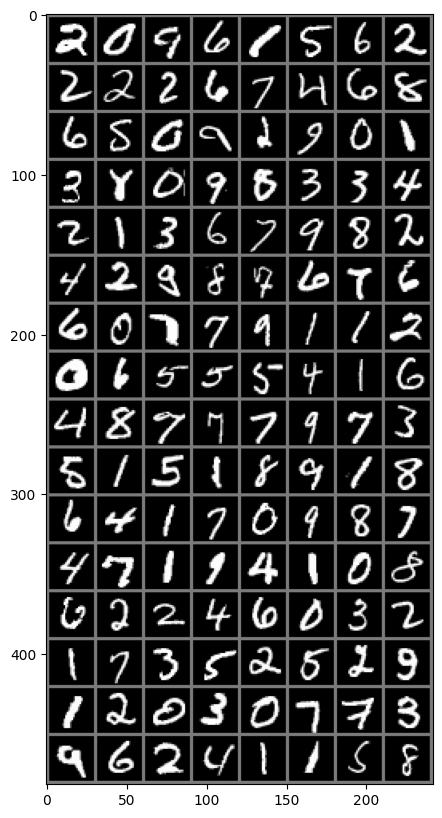

2 0 9 6 1 5 6 2 2 2 2 6 7 4 6 8 6 5 0 9 2 9 0 1 3 8 0 9 8 3 3 4 2 1 3 6 7 9 8 2 4 2 9 8 7 6 7 6 6 0 7 7 9 1 1 2 0 6 5 5 5 4 1 6 4 8 7 7 7 9 7 3 5 1 5 1 8 9 1 8 6 4 1 7 0 9 8 7 4 7 1 9 4 1 0 8 6 2 2 4 6 0 3 2 1 7 3 5 2 5 2 9 1 2 0 3 0 7 7 3 9 6 2 4 1 1 5 8


In [ ]:
# Load and Visualize a Transformed Image
def unnormalize(image, mean, std):
    mean = torch.tensor(mean).view(-1, 1, 1)
    print(mean.shape)
    std = torch.tensor(std).view(-1, 1, 1)
    return image * std + mean


def image_show(image):
    image = unnormalize(image, mean, std).numpy()
    image = np.transpose(image, (1, 2, 0))
    fig, axs = plt.subplots(1, 1, figsize=(10, 10))
    axs.imshow(image)
    plt.show()


dataiter = iter(trainloader)
images, labels = next(dataiter)
classes = np.arange(10)

# show images
img_grid = torchvision.utils.make_grid(images)
image_show(img_grid)
# print labels
print(' '.join(f'{classes[labels[j]]}' for j in range(batch_size)))

In [ ]:
# Build a simple Fully Connected Network
class FCN(nn.Module):

    def __init__(self, nodes, input_size=28*28, classes=10):
        super().__init__()
        self.flatten = nn.Flatten()
        layers = []
        layers.append(nn.Linear(input_size, nodes[0]))
        layers.append(nn.ReLU(inplace=True))
        for i in range(len(nodes)-1):
            layers.append(nn.Linear(nodes[i], nodes[i+1]))
            layers.append(nn.ReLU(inplace=True))

        self.sequential = nn.Sequential(*layers)
        self.final = nn.Linear(nodes[-1], classes)

    def forward(self, x):
        x = self.flatten(x)
        x = self.sequential(x)
        out = self.final(x)

        return out

# Build a CNN
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 5, padding=2)
        self.pool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 32, 5, padding=2)
        self.fc1 = nn.Linear(32 * 7 * 7, 10)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.fc1(x)

        return x



In [ ]:
import torch.optim as optim

# Here we define the number of nodes per layer in a list, the SGD optimizer we want to use to train the model, and the loss (CrossEntropy) to apply to the output.
nodes = [128, 64, 32]
model = FCN(nodes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Helper function that calculates the Accuracy of a given dataset/dataloader
def accuracy(loader):
    model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for i, data in enumerate(loader):
            images, labels = data
            ypred = F.softmax(model(images))
            ypred = np.argmax(ypred, axis=1)
            total += labels.size(0)
            correct += (ypred == labels).sum()
    model.train()
    return  correct / total
print(accuracy(testloader))

C:\Users\jason\AppData\Local\Temp\ipykernel_11056\519675945.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  ypred = F.softmax(model(images))


tensor(0.0832)


### *As expected the initial accuracy is equivalent to random guessing: $p = \frac{1}{N_{classes}} = 0.1$*

In [ ]:
for epoch in range(5):  # loop over the dataset multiple times. An epoch is an entire run through the entire dataset
    running_loss = 0.0

    # Run through the entire dataset using the trainloader
    for i, data in enumerate(trainloader, 0):

        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward() # the backward() function is called on the output to calculate the gradients of loss w.r.t. all other Network parts with .requires_grad(True)
        optimizer.step()
        running_loss += loss.item()

        # Let us now do the logging
        if i % 40 == 39:    # Every 1000 mini-batches...
            print('Batch {}'.format(i + 1))
            # Check against the validation set
            running_vloss = 0.0

            # In evaluation mode some model specific operations can be omitted eg. dropout layer
            model.train(False) # Switching to evaluation mode, eg. turning off regularisation
            for j, vdata in enumerate(testloader, 0):
                vinputs, vlabels = vdata
                voutputs = model(vinputs)
                vloss = criterion(voutputs, vlabels)
                running_vloss += vloss.item()

            model.train(True) # Switching back to training mode, eg. turning on regularisation
            avg_loss = running_loss / 40
            avg_vloss = running_vloss / len(testloader)
            print("Avg losses", avg_loss, avg_vloss)
            running_loss = 0.0


print('Finished Training')


Batch 40
Avg losses 2.2966656267642973 2.2752489198612262
Batch 80
Avg losses 2.2522961139678954 2.2191579160811026
Batch 120
Avg losses 2.1763742327690125 2.128926944129075
Batch 160
Avg losses 2.067669576406479 1.9853282004972048
Batch 200
Avg losses 1.8873651891946792 1.7586944178689885
Batch 240
Avg losses 1.6181820452213287 1.4577803068523165
Batch 280
Avg losses 1.3093868017196655 1.155832658840131
Batch 320
Avg losses 1.046566505730152 0.9367304165152055
Batch 360
Avg losses 0.8609570145606995 0.7998183448857898
Batch 400
Avg losses 0.7658294469118119 0.7049457332755946
Batch 440
Avg losses 0.6852345958352088 0.6489064831145203
Batch 40
Avg losses 0.5967922978103161 0.5643349902916558
Batch 80
Avg losses 0.5564009808003902 0.5497496062064473
Batch 120
Avg losses 0.5128914535045623 0.5023652350978006
Batch 160
Avg losses 0.5208580039441586 0.49271513946071455
Batch 200
Avg losses 0.5031411454081536 0.464001025768775
Batch 240
Avg losses 0.4630639560520649 0.4447366934788378
Batch

In [ ]:
print("Validation accuracy is: ", accuracy(testloader).item())

C:\Users\jason\AppData\Local\Temp\ipykernel_11056\519675945.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  ypred = F.softmax(model(images))


Validation accuracy is:  0.9189000129699707


In [ ]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if i % 40 == 39:    # Every 1000 mini-batches...
            print('Batch {}'.format(i + 1))
            # Check against the validation set
            running_vloss = 0.0

            # In evaluation mode some model specific operations can be omitted eg. dropout layer
            model.train(False) # Switching to evaluation mode, eg. turning off regularisation
            for j, vdata in enumerate(testloader, 0):
                vinputs, vlabels = vdata
                voutputs = model(vinputs)
                vloss = criterion(voutputs, vlabels)
                running_vloss += vloss.item()

            model.train(True) # Switching back to training mode, eg. turning on regularisation
            avg_loss = running_loss / 40
            avg_vloss = running_vloss / len(testloader)
            print("Avg losses", avg_loss, avg_vloss)
            running_loss = 0.0

print('Finished Training')

# Let us now save the model state
torch.save(model.state_dict(), './Models/model_weights.pth')

# You can then Load the model in the following manner
model = CNN()
model.load_state_dict(torch.load("./Models/model_weights.pth"))

Batch 40
Avg losses 2.0524304777383806 1.5698749415482147
Batch 80
Avg losses 1.0520578473806381 0.6022669386260117
Batch 120
Avg losses 0.4826400697231293 0.38301076079848445
Batch 160
Avg losses 0.3452473174780607 0.3001652810769745
Batch 200
Avg losses 0.2983968198299408 0.2601572338821767
Batch 240
Avg losses 0.2552861824631691 0.2285564820741928
Batch 280
Avg losses 0.24074672851711512 0.20544227219740802
Batch 320
Avg losses 0.23159390222281218 0.19253779537504231
Batch 360
Avg losses 0.2002657840028405 0.17938763815673847
Batch 400
Avg losses 0.18464927151799201 0.17007862512446656
Batch 440
Avg losses 0.1851887185126543 0.1612761335305964
Batch 40
Avg losses 0.1494924096390605 0.15036956338754184
Batch 80
Avg losses 0.1578316291794181 0.14052349286554736
Batch 120
Avg losses 0.14929232858121394 0.13183675491239263
Batch 160
Avg losses 0.14705833308398725 0.13670459287123213
Batch 200
Avg losses 0.137859526835382 0.12162741311366045
Batch 240
Avg losses 0.13229830591008068 0.117

<All keys matched successfully>

In [ ]:
print("Validation accuracy is: ", accuracy(testloader).item())

C:\Users\jason\AppData\Local\Temp\ipykernel_11056\519675945.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  ypred = F.softmax(model(images))


Validation accuracy is:  0.9814000129699707


torch.Size([3, 224, 224])


Text(0.5, 1.0, 'A sample image')

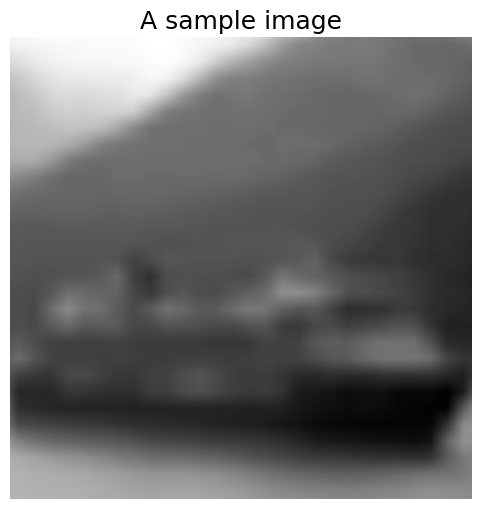

In [ ]:
# You can then Load the model in the following manner
model = CNN()
model.load_state_dict(torch.load("./Models/model_weights.pth"))

# Let's visualize the feature maps
# Acquire an image
images = next(iter(trainloader))
image = images[0][0]
print(image.shape)

fig, axs = plt.subplots(1, 1, figsize=(6, 6))
axs.imshow(image.numpy()[0, :, :], cmap="gray")
axs.axis("off")
axs.set_title("A sample image", fontsize=18)

In [ ]:
with torch.no_grad():
    feat_map1 = model.conv1(image)
    print(feat_map1.shape)
    feat_map1 = feat_map1.detach().numpy()
    fig, axs = plt.subplots(4, 4, figsize=(12, 12))
    for i, ax in enumerate(axs.flat):
        if i < feat_map1.shape[1]:  # Check if the channel index is less than the number of channels
            # Index the batch dimension (0) and the channel dimension (i)
            ax.imshow(feat_map1[i, :, :], cmap="gray")
            ax.axis('off')  # Hide the axis
        else:
            ax.axis('off')  # Hide the axis for unused subplots

    fig.suptitle("Conv1 Filter Maps", fontsize=18)

    feat_map2 = model.conv1(image)
    feat_map2 = F.relu(feat_map2)
    feat_map2 = model.pool(feat_map2)
    feat_map2 = model.conv2(feat_map2)
    print(feat_map2.shape)
    feat_map2 = feat_map2.detach().numpy()
    fig, axs = plt.subplots(6, 4, figsize=(12, 12))
    for i, ax in enumerate(axs.flat):
        if i < feat_map2.shape[0]:  # Check if the channel index is less than the number of channels
            # Index the batch dimension (0) and the channel dimension (i)
            ax.imshow(feat_map2[i, :, :], cmap="gray")
            ax.axis('off')  # Hide the axis
        else:
            ax.axis('off')  # Hide the axis for unused subplots

    fig.suptitle("Conv2 Filter Maps", fontsize=18)


RuntimeError: Given groups=1, weight of size [16, 1, 5, 5], expected input[1, 3, 224, 224] to have 1 channels, but got 3 channels instead

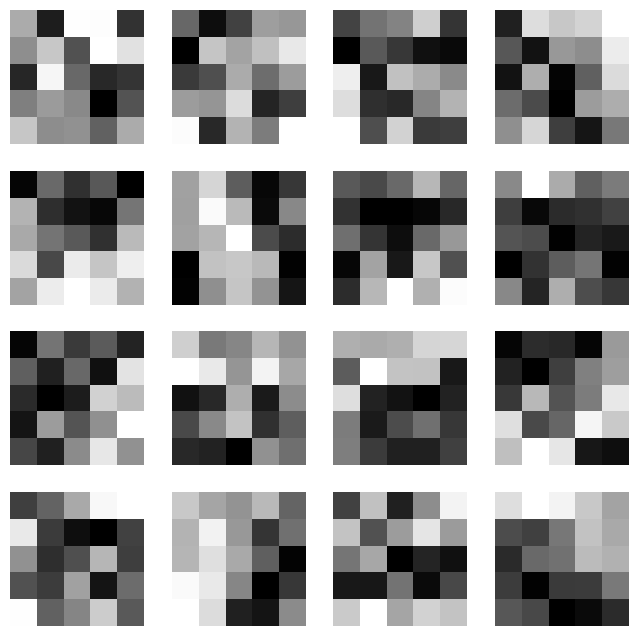

In [ ]:
# Visualizing the kernels
# Extracting the weights of the first convolutional layer
# The shape of the weights is [out_channels, in_channels, kernel_height, kernel_width]
kernels = model.conv1.weight.detach()

# Move kernels to CPU if they are on GPU
kernels = kernels.cpu()

# Normalize kernels to [0,1] for visualization
kernels = (kernels - kernels.min()) / (kernels.max() - kernels.min())

# Assuming you're dealing with a single input channel (e.g., grayscale images),
# you might want to visualize each output channel's kernel separately.
num_kernels = kernels.size(0)

# Set up the subplot dimensions
cols = int(np.sqrt(num_kernels))
rows = (num_kernels // cols) + (0 if num_kernels % cols == 0 else 1)

fig, axs = plt.subplots(rows, cols, figsize=(cols*2, rows*2))

for i, ax in enumerate(axs.flat):
    if i < num_kernels:
        # Select the i-th kernel, note that kernels[i].shape == [in_channels, H, W],
        # for grayscale (single channel inputs), it will be [1, H, W].
        # We squeeze it to [H, W] for visualization.
        kernel = kernels[i].squeeze()
        # For single-channel inputs, you can index as [0] to get the 2D kernel if in_channels > 1.
        # If your model works with multi-channel images (e.g., RGB), you'll need a strategy
        # to visualize these 3D kernels, such as showing each input channel's kernel separately.

        ax.imshow(kernel, cmap='gray')
        ax.axis('off')
    else:
        ax.axis('off')

plt.show()

### ***Note:*** *Some of the above kernels, even though the Network was only trained for a few epoches managed to encapsulate diagonals, vertical, horizontal lines and blobs.*

---

### ***Transfer Learning*** is widely used to accelerate Model building and utilize pre-existing knowledge/experties about a specific data field. For example, there is a multitude of Huge, Trained models that have widely captured the intricasies of the Images of the physical World. Now, assume I have a specific task at hand, which involves classifying a specific set of Images. Instead of training a huge network again, ***I can simply use a pretrained model*** and ***only Train the last Fully-Connected Layers that perform the classification task***. One can even go a step further and ***allow for the last convolutions to be trainable*** to increase the accuracy even more. (Note the the deeper the convolutions are the more semantic the task they carry out is)


<div style="margin: auto; width: 90%">
<img src="https://www.researchgate.net/publication/338540456/figure/fig1/AS:850909840015360@1579884123355/Transfer-learning-Transfer-learning-is-process-of-taking-pretrained-model-usually.png" alt="Subdirectory Image" width="900"/>
</div>


In [ ]:
# Transfer Learning
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),  # Match ResNet input size
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
model = torchvision.models.resnet18(pretrained=True)

# Freeze model parameters (for feature extraction only, remove for fine-tuning)
for param in model.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(classes))  # Adapt to CIFAR-10

# Move the model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)


C:\Users\jason\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\jason\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
criterion = nn.CrossEntropyLoss()

# Optimize only the fully connected layer (for fine-tuning, include all parameters)
optimizer = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)


In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')


KeyboardInterrupt: 

In [ ]:
print(accuracy(testloader))

C:\Users\jason\AppData\Local\Temp\ipykernel_19284\935040142.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  ypred = F.softmax(model(images))


tensor(0.7541)
